<a href="https://colab.research.google.com/github/morrowbord/matstat/blob/main/terver_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import statistics
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [151]:
# Задача 1

# Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

# и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

# Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
# Является ли значимым получившееся уравнение регрессии?

In [152]:
x=pd.DataFrame(X)
x

,0,1,2,3
0,1.224013,2.308685,3.036364,2.692872
1,-0.187573,1.303374,5.120930,3.463632
2,-0.810945,1.824634,5.796865,1.861594
3,0.751290,2.673921,3.655298,1.667461
4,0.009724,1.973673,2.505943,1.697552
5,-0.629726,0.777508,2.841240,4.544106
6,2.295362,1.812067,1.950262,1.518746
7,0.092042,2.269714,7.477087,2.610812
8,2.392528,3.175640,3.614206,5.107734
9,0.549838,2.879887,1.657528,1.596360


In [153]:
y=pd.DataFrame(y)

In [154]:
x01=x[[0,1]]
x02=x[[0,2]]
x03=x[[0,3]]
x23=x[[2,3]]
x13=x[[1,3]]
x12=x[[1,2]]

In [155]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x01, y)
model1.intercept_, model1.coef_

(array([6.70781579]), array([[0.40786841, 1.03360247]]))

In [156]:
model1.score(x01, y)

0.18113594742585204

In [157]:
model2 = LinearRegression().fit(x02, y)
model2.intercept_, model2.coef_

(array([3.62455695]), array([[1.62531203, 1.21134979]]))

In [158]:
max_r2=model2.score(x02, y)
max_r2

0.7634246238793151

In [159]:
model3 = LinearRegression().fit(x03, y)
model3.intercept_, model3.coef_

(array([5.70686123]), array([[0.68359949, 1.12650707]]))

In [160]:
model3.score(x03, y)

0.4532966783144078

In [161]:
model4 = LinearRegression().fit(x12, y)
model4.intercept_, model4.coef_

(array([2.48896193]), array([[1.60611956, 0.86269915]]))

In [162]:
model4.score(x12, y)

0.547948273403901

In [163]:
model5 = LinearRegression().fit(x13, y)
model5.intercept_, model5.coef_

(array([1.91685221]), array([[1.74373667, 1.31971882]]))

In [164]:
model5.score(x13, y)

0.6062055761129932

In [165]:
model6 = LinearRegression().fit(x23, y)
model6.intercept_, model6.coef_

(array([3.64001086]), array([[0.70753914, 1.04851745]]))

In [166]:
model6.score(x23, y)

0.622441987650532

In [167]:
# Является ли значимым получившееся уравнение регрессии для model2 ?

In [168]:
n = x02.shape[0]
m = x02.shape[1]

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

Возьмём уровень значимости alpha = 0.05.

In [169]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

In [170]:
F = (max_r2/m) / ((1 - max_r2) / k2)
F

11.294439122922642

Статистика F>4.73 -значит она попала в критическую область, уравнение регрессии признаётся значимым.

In [171]:
import statsmodels.api as sm
const=sm.add_constant(x02,model2.intercept_)
model = sm.OLS(y,const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     11.29
Date:                Fri, 17 Sep 2021   Prob (F-statistic):            0.00644
Time:                        08:33:01   Log-Likelihood:                -15.767
No. Observations:                  10   AIC:                             37.53
Df Residuals:                       7   BIC:                             38.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6246      1.261      2.875      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


p-value = 0.00644 < alfa - гипотеза о незначимости коэфф. не подтвердилась. Gолучившееся уравнение регрессии - значимое

**Задача 2**

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

`salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]`

`scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]`
Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной 
регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
(доп) Посчитать среднюю ошибку аппроксимации

In [172]:
x= np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y= np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

метод парной регрессии для коэфф. a и b 

In [173]:
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)

b0, b1

(444.1773573243596, 2.620538882402765)

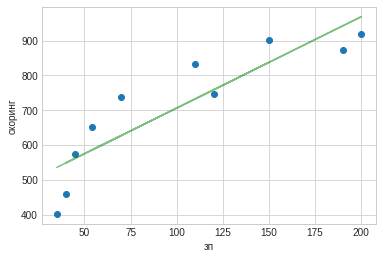

In [174]:
plt.style.use('seaborn-whitegrid')
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='green', alpha=0.5)

plt.xlabel('зп')
plt.ylabel('скоринг');


метод наименьших квадратов для коэфф. a и b 

In [175]:
x= pd.DataFrame([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y= pd.DataFrame([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [176]:
ones = np.ones((x.shape[0], 1))
# xx=x
x = np.hstack((ones, x))

In [177]:
XTX = x.T.dot(x)

np.linalg.det(XTX)

349464.00000000023

In [178]:
# Определитель не близок к нулю, поэтому проблем с методом нет. Коэффициенты модели:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x.T).dot(y)
print(b)

[[444.17735732]
 [  2.62053888]]


проверка

In [179]:
modelx = LinearRegression().fit(x, y)
print(type(modelx))
modelx.intercept_, modelx.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(array([444.17735732]), array([[0.        , 2.62053888]]))

найдем r^2

In [190]:
r2=modelx.score(x,y)

In [183]:
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     29.67
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           0.000611
Time:                        08:33:01   Log-Likelihood:                -58.064
No. Observations:                  10   AIC:                             120.1
Df Residuals:                       8   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.1774     56.466      7.866      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [203]:
# Оцените построенное уравнение регрессии с помощью F-критерия Фишера
n = x.shape[0]
m = x.shape[1] - 1#(вычитаем столбец единиц!)

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [201]:
alpha = 0.05
f = stats.f.ppf(1 - alpha, k1, k2)
f

5.317655071578714

In [202]:
F = (r2/m) / ((1 - r2) / k2)
F

29.67164085966449

F>f - уравнение значимое, коэфф детерминации не равен нулю.

**Посчитаем среднюю ошибку аппроксимации:**

In [205]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [206]:
mean_approximation_error(y, z)

0    0.114693
dtype: float64